# GA DSI 26: Project 2 - Ames Housing Data and Kaggle Challenge
***

### Project Notebooks organisation  
- **Notebook 1 - Data Cleaning, EDA and Data Visualisation (current notebook)**
- Notebook 2 - Feature Engineering 
- Notebook 3 - Pre-processing, Model Benchmarks, Production Model and Kaggle Submission
***

## Introduction and Problem Statement

The dataset provided is based on housing information in Ames, which is a city in Story County, Iowa, United States. It is best known as the home of Iowa State University, with leading agriculture, design, engineering, and veterinary medicine colleges. The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses.

Homeowners are always looking to increase the value of their house through renovation, addition of new features and maintenance. However, there is no clarity on which features to focus on with the goal of increasing the value of the house. Hence, in this project, I am a home owner in Ames exploring to sell my current house and want to find out which features I should improve or renovate to increase the house value/ sale price before selling my house. The key concern of a home owner would be to know which features will have a major impact on the sale price/value of a house and those features that do not have a significant impact on the sale price.

This project aims to answer the above questions by fitting models to the Ames Housing Dataset and determining which features would have the most impact on the sales price. This model will attempt to predict the features that will have a large impact on the sale price of the house.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

## Import data and first look at the train data

In [2]:
# import train.csv data
train = pd.read_csv('../datasets/train.csv')

# changing columns labels to lowercase and remove space
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '_')

In [3]:
# to check that the columns names have been made lowercase and spaces are replaced.

train.head(10)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [4]:
# to check for the shape, data types and non-null count in the columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

The training dataset for the Ames housing consists of 81 columns with 2051 rows. As mentioned in the introduction, the columns consist of the various features relating to the houses like building class, zoning, utilities and neighbourhood.


## Data cleaning, data types, checking for null values and imputing null values

In [5]:
# check for the columns with the most number of null values

train.isnull().sum().sort_values(ascending = False).head(30)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
mo_sold              0
sale_type            0
full_bath            0
half_bath            0
dtype: int64

As seen from the information above, the columns with the greatest number of null values have been identified and sorted in descending order the number of null values within that column.

Referencing the data dictionary for the training dataset, the columns and what the null values means are as follow:
- ```pool_qc``` (Pool quality): nan means no pool.
- ```misc_feature``` (Miscellaneous feature not covered in other categories): nan means none
- ```alley``` (Type of alley access to property): nan means no alley access
- ```fence``` (Fence quality): nan means no fence
- ```fireplace_qu``` (Fireplace quality): nan means no fireplace
- ```garage_finish``` (Interior finish of the garage): nan means no garage
- ```garage_qual``` (Garage quality): nan means no garage
- ```garage_yr_blt``` (Year garage was built): nan likely mean no garage hence there is no year input
- ```garage_cond``` (Garage condition): nan means no garage
- ```garage_type``` (Garage location): nan means no garage
- ```bsmt_exposure``` (Walkout or garden level basement walls): nan means no basement
- ```bsmtfin_type_2``` (Quality of second finished area (if present)): nan means no basement
- ```bsmtfin_type_1``` (Quality of basement finished area): nan means no basement
- ```bsmt_cond``` (General condition of the basement): nan means no basement
- ```bsmt_qual``` (Height of the basement): nan means no basement
- ```mas_vnr_area``` (Masonry veneer area in square feet): nan is likely to mean 0 area of masonry veneer area.
- ```mas_vnr_type``` (Masonry veneer type): nan is likely to be the same as None. 

From the list above, a majority of the null values in the columns represent houses that do not have this feature (e.g. fireplace quality, alley access, garage quality and etc), upon comparison with the data dictionary, I will be replacing these null values with ‘None’ in these columns. As for the columns with numerical features like masonry veneer area and lot frontage, I will be replacing the null values in these columns with 0. 

The remaining columns (```bsmt_half_bath, bsmt_full_bath, garage_area, total_bsmt_sf, bsmt_unf_sf, bsmtfin_sf_2, bsmtfin_sf_1, garage_cars```) with 1 to 2 rows of null values are likely to be errors during data entry or collection and we shall drop these 1 to 2 rows within as they make up a very small proportion of the dataset and would not likely affect the results.

### Null values imputations

In [6]:
# check the null values in the bsmt_half_bath column
train[(train['bsmt_half_bath'].isnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [7]:
# check the null values in the garage_area column
train[(train['garage_area'].isnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


Checking the 2 rows in the bsmt_half_bath column and 1 row in garage_area column with null values and the rows do not posses any significant information and hence will drop the rows with null values in those columns with 1 or 2 null values. 

In [8]:
def drop_rows(df, col):
    """function to drop null values in a specific column"""
    df.dropna(subset = [col], inplace = True)

In [9]:
# drop the rows in columns with 1 or 2 null values

# create the list of columns with 1 or 2 null values
null_df = pd.DataFrame(train.isnull().sum().sort_values(ascending = False))
nullcol_drop_list = null_df.index[(null_df[0]<= 2) & (null_df[0]> 0)].tolist()

for col in nullcol_drop_list:
    drop_rows(train, col)

In [10]:
# check that the rows in the columns with 1 or 2 null values are dropped. 
train.shape

(2048, 81)

In total,  3 rows have been dropped from the dataset from the columns with 1 or 2 null values as the number of rows have decreased from 2051 to 2048.

In the next step, I will be replacing certain of the null values with None and 0 for categorical and numerical features respectively. 

In [11]:
def replace_to_none(df, col):
    """function to replace null values with None in a specific col"""
    df[col].fillna('None', inplace = True)

In [12]:
# change null values in these columns to None

col_list_none = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu', 'garage_finish',\
                 'garage_qual', 'garage_cond', 'garage_type', 'bsmt_exposure', 'bsmtfin_type_2',\
                 'bsmtfin_type_1', 'bsmt_cond', 'bsmt_qual', 'mas_vnr_type']

for col in col_list_none:
    replace_to_none(train, col)

In [13]:
def replace_to_zero(df, col):
    """function to replace null values with 0 in a specific col"""
    df[col].fillna(0, inplace = True)

In [14]:
# change null values in these columns to 0
col_list_zero = ['mas_vnr_area', 'garage_yr_blt']

for col in col_list_zero:
    replace_to_zero(train, col)

### ```lot_frontage``` null value impute

The feature of ```lot_frontage``` (Linear feet of street connected to property) has 16% (330 rows) of null values and it would be easy to just impute the null values with 0 to indicate that these house are on lots that do not have any distance that is connected to street which might indicate that all these lots are in alleys.

In [15]:
train[(train['lot_frontage'].isnull()) & (~train['alley'].isnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,None,IR1,Lvl,...,0,0,None,MnPrv,None,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,None,Reg,Lvl,...,0,0,None,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,None,IR1,Lvl,...,0,0,None,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,...,0,0,None,None,None,0,7,2008,WD,198000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,560,532376110,20,RL,NaN,7791,Pave,None,IR1,Lvl,...,0,0,None,GdWo,None,0,10,2009,WD,129000
2022,2872,909475020,20,RL,NaN,16381,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,12,2006,WD,223000
2028,2526,534127190,20,RL,NaN,20781,Pave,None,IR2,Lvl,...,0,0,None,None,None,0,6,2006,WD,262500
2031,25,527402250,20,RL,NaN,12537,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,4,2010,WD,149900


From the above dataframe, it can be seen that there are 8 rows with null lot frontage value and with alley access while there are another 322 rows that do not have alley access but have null lot frontage value. For this project, we will be making the assumption that the data is missing completely at random (MCAR) and we will be imputing the null values in lot frontage column with the median of the lot frontage column.

In [16]:
# impute null values in 'lot_frontage' column with median

train['lot_frontage'].fillna(train['lot_frontage'].median(), inplace = True)

In [17]:
# confirm that all null values in the dataframe have been replaced
train.isnull().sum().sum()

0

### Changing of data type for ```ms_subclass```

For the column of```'ms_subclass'```, the numbers in the column is actually referring to the building classes of the house hence it is to be converted to a string type. 


In [18]:
train['ms_subclass'] = train['ms_subclass'].astype(str)

In [19]:
# to check the data types of each columns is correct after the replacement
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2048 non-null   int64  
 1   pid              2048 non-null   int64  
 2   ms_subclass      2048 non-null   object 
 3   ms_zoning        2048 non-null   object 
 4   lot_frontage     2048 non-null   float64
 5   lot_area         2048 non-null   int64  
 6   street           2048 non-null   object 
 7   alley            2048 non-null   object 
 8   lot_shape        2048 non-null   object 
 9   land_contour     2048 non-null   object 
 10  utilities        2048 non-null   object 
 11  lot_config       2048 non-null   object 
 12  land_slope       2048 non-null   object 
 13  neighborhood     2048 non-null   object 
 14  condition_1      2048 non-null   object 
 15  condition_2      2048 non-null   object 
 16  bldg_type        2048 non-null   object 
 17  house_style   

## Exploratory Visualizations

In [20]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2048.0,1.473714e+03,8.444254e+02,1.0,7.527500e+02,1483.5,2.197500e+03,2930.0
pid,2048.0,7.133064e+08,1.886843e+08,526301100.0,5.284581e+08,535453155.0,9.071770e+08,924152030.0
lot_frontage,2048.0,6.885352e+01,2.127740e+01,21.0,6.000000e+01,68.0,7.800000e+01,313.0
lot_area,2048.0,1.004968e+04,6.697168e+03,1300.0,7.500000e+03,9432.0,1.151275e+04,159000.0
overall_qual,2048.0,6.114258e+00,1.426126e+00,1.0,5.000000e+00,6.0,7.000000e+00,10.0
overall_cond,2048.0,5.560547e+00,1.104349e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.0
year_built,2048.0,1.971751e+03,3.017411e+01,1872.0,1.954000e+03,1974.0,2.001000e+03,2010.0
year_remod/add,2048.0,1.984194e+03,2.103393e+01,1950.0,1.964750e+03,1993.0,2.004000e+03,2010.0
mas_vnr_area,2048.0,9.877100e+01,1.744115e+02,0.0,0.000000e+00,0.0,1.600000e+02,1600.0
bsmtfin_sf_1,2048.0,4.424648e+02,4.613199e+02,0.0,0.000000e+00,368.0,7.340000e+02,5644.0


From the above summary statistics table, some of the more notable observations that can be drawn are as follows:
- The minimum price a house was sold for was \\$12,789 and maximum price was \\$611,657 while the mean is \\$181,484 and median is \\$162,500.
- The minimum area is 1,300 square feet and the maximum area is 159,000 square feet while the mean area is 10,049 square feet and median is 9,432 square feet.
- The earliest year for a house sold that was built was in 1872 and the latest year is 2010 while the mean year built is 1971 and median is 1974.


### Exploring correlations

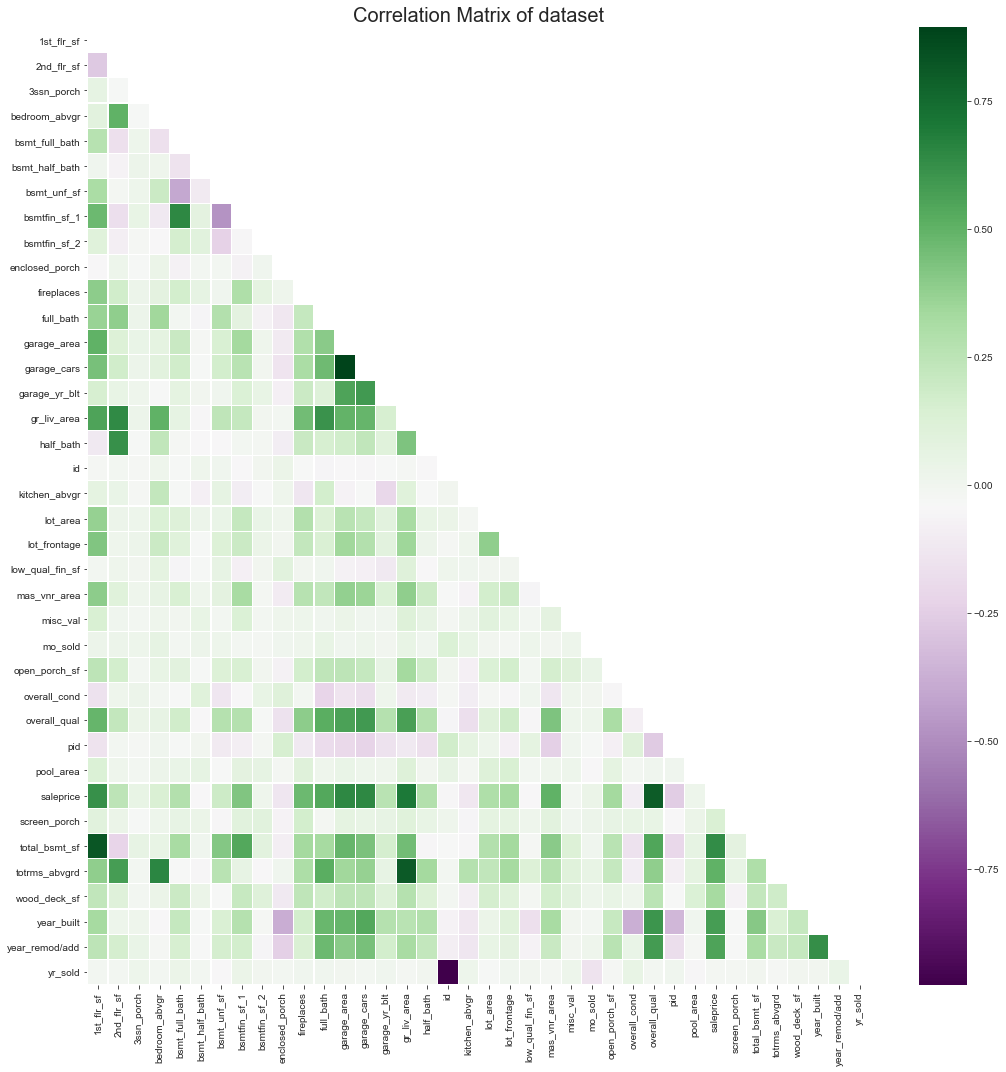

In [21]:
train = train[train.columns.sort_values()]

fig , ax = plt.subplots(figsize = (15,15))
train_corr = train.corr()
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = train_corr, mask = mask, linewidth = 0.1, cmap = "PRGn")
ax.set_title("Correlation Matrix of dataset", fontsize = 20)
plt.tight_layout();

From the correlation matrix heatmap above, we can also spot several collinear features:

- `garage_cars` collinear with `garage_area` 
- `totrms_abvgrd` collinear with `gr_liv_area`
- `total_bsmt_sf` is collinear with `1st_flr_sf`

These features would have to be dealt after looking at more EDA. 

In [22]:
# sorting of correlation matrix compared to sales prices

train_corr_sorted = pd.DataFrame(train_corr['saleprice'].sort_values(ascending = False))
train_corr_sorted

,saleprice
saleprice,1.000000
overall_qual,0.800975
gr_liv_area,0.698046
garage_area,0.650000
garage_cars,0.648103
total_bsmt_sf,0.631507
1st_flr_sf,0.621181
year_built,0.572256
year_remod/add,0.550055
full_bath,0.537369


It can be seen from the above sorted correlation coefficients with respect to sale price, the features with a strong correlation coefficient are overall quality, ground living area, garage area and size of garage in car capacity.


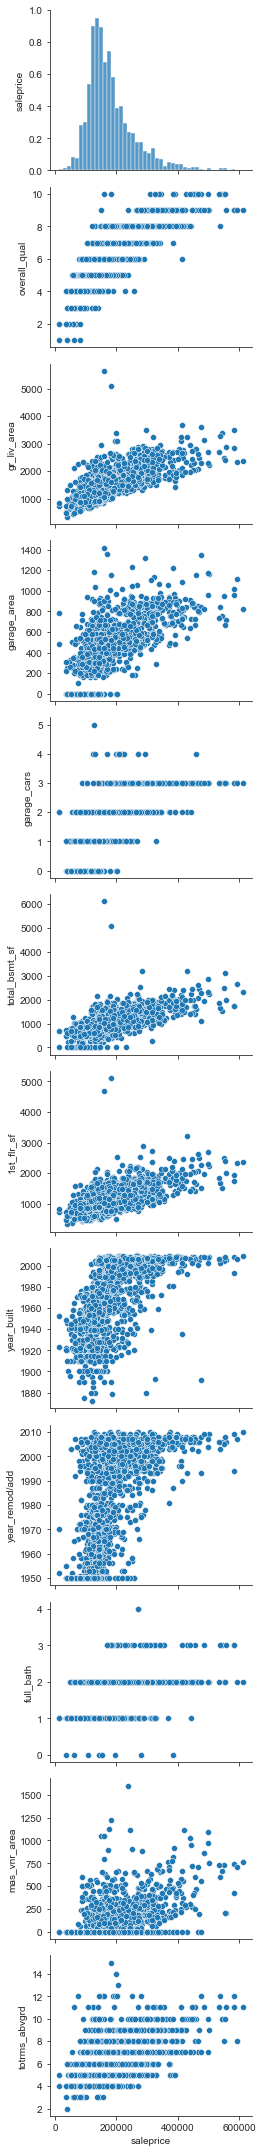

In [23]:
# plotting the pairplots for the variables with correlation coefficient of 0.25 and above

# y_list = ['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf',\
#           '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath', 'mas_vnr_area',\
#           'totrms_abvgrd', 'fireplaces', 'bsmtfin_sf_1', 'open_porch_sf', 'wood_deck_sf',\
#           'lot_frontage', 'lot_area', 'bsmt_full_bath', 'half_bath', 'garage_yr_blt']
y_list = train_corr_sorted.index[(train_corr_sorted['saleprice'] >= 0.5)].tolist()

sns.pairplot(data = train, x_vars = ['saleprice'], y_vars = y_list, aspect = 1.5)
plt.tight_layout();

### Custom functions for plotting various subplots

In [24]:
# Custom functions for plotting of subplots

def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    """Function to plot histogram subplots"""
    nrows = int(np.ceil(len(list_of_columns) / 3)) 
    fig, ax = plt.subplots(nrows = nrows, ncols = 3, sharex = False, sharey = False, squeeze = True, figsize = (20,70))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column]) 
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

def subplot_boxplots(dataframe, list_of_columns, list_of_titles, list_of_xlabels, y = 'saleprice'):
    """Function to plot box subplots"""
    nrows = int(np.ceil(len(list_of_columns) / 3)) 
    fig, ax = plt.subplots(nrows = nrows, ncols = 3, sharex = False, sharey = False, squeeze = True, figsize = (20,100))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x = dataframe[column], y = dataframe[y], ax = ax[i])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        
def subplot_scatterplots(dataframe, list_of_columns, list_of_titles, list_of_xlabels, y = 'saleprice'):
    """Function to plot scatter subplots"""
    nrows = int(np.ceil(len(list_of_columns) / 3)) 
    fig, ax = plt.subplots(nrows = nrows, ncols = 3, sharex = False, sharey = False, squeeze = True, figsize = (20,100))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns): 
        sns.regplot(x = dataframe[column], y = dataframe[y], ax = ax[i], color = 'green')
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

### Plotting Histograms for Categorical and Numerical Features

I will be plotting the histograms of all the categorical and numerical features in the train dataset to observe if there are any specific patterns among the features. I will also be identifying those features with a large percentage of single values as possible columns to drop.

In [25]:
# Create respective lists for numerical and categorical features in the dataset

numerical_list = [col for col in train.columns if train[col].dtype != object]

categorical_list = [col for col in train.columns if col not in numerical_list]

In [26]:
# Creating new list for titles and x labels for numerical features

numerical_title = [word.replace('_', ' ').title() + ' Distribution' for word in numerical_list]
numerical_x_labels = [word.replace('_', ' ').title() for word in numerical_list]

In [27]:
# Creating new list for titles and x labels for categorical features

categorical_title = [word.replace('_', ' ').title() + ' Distribution' for word in categorical_list]
categorical_x_labels = [word.replace('_', ' ').title() for word in categorical_list]

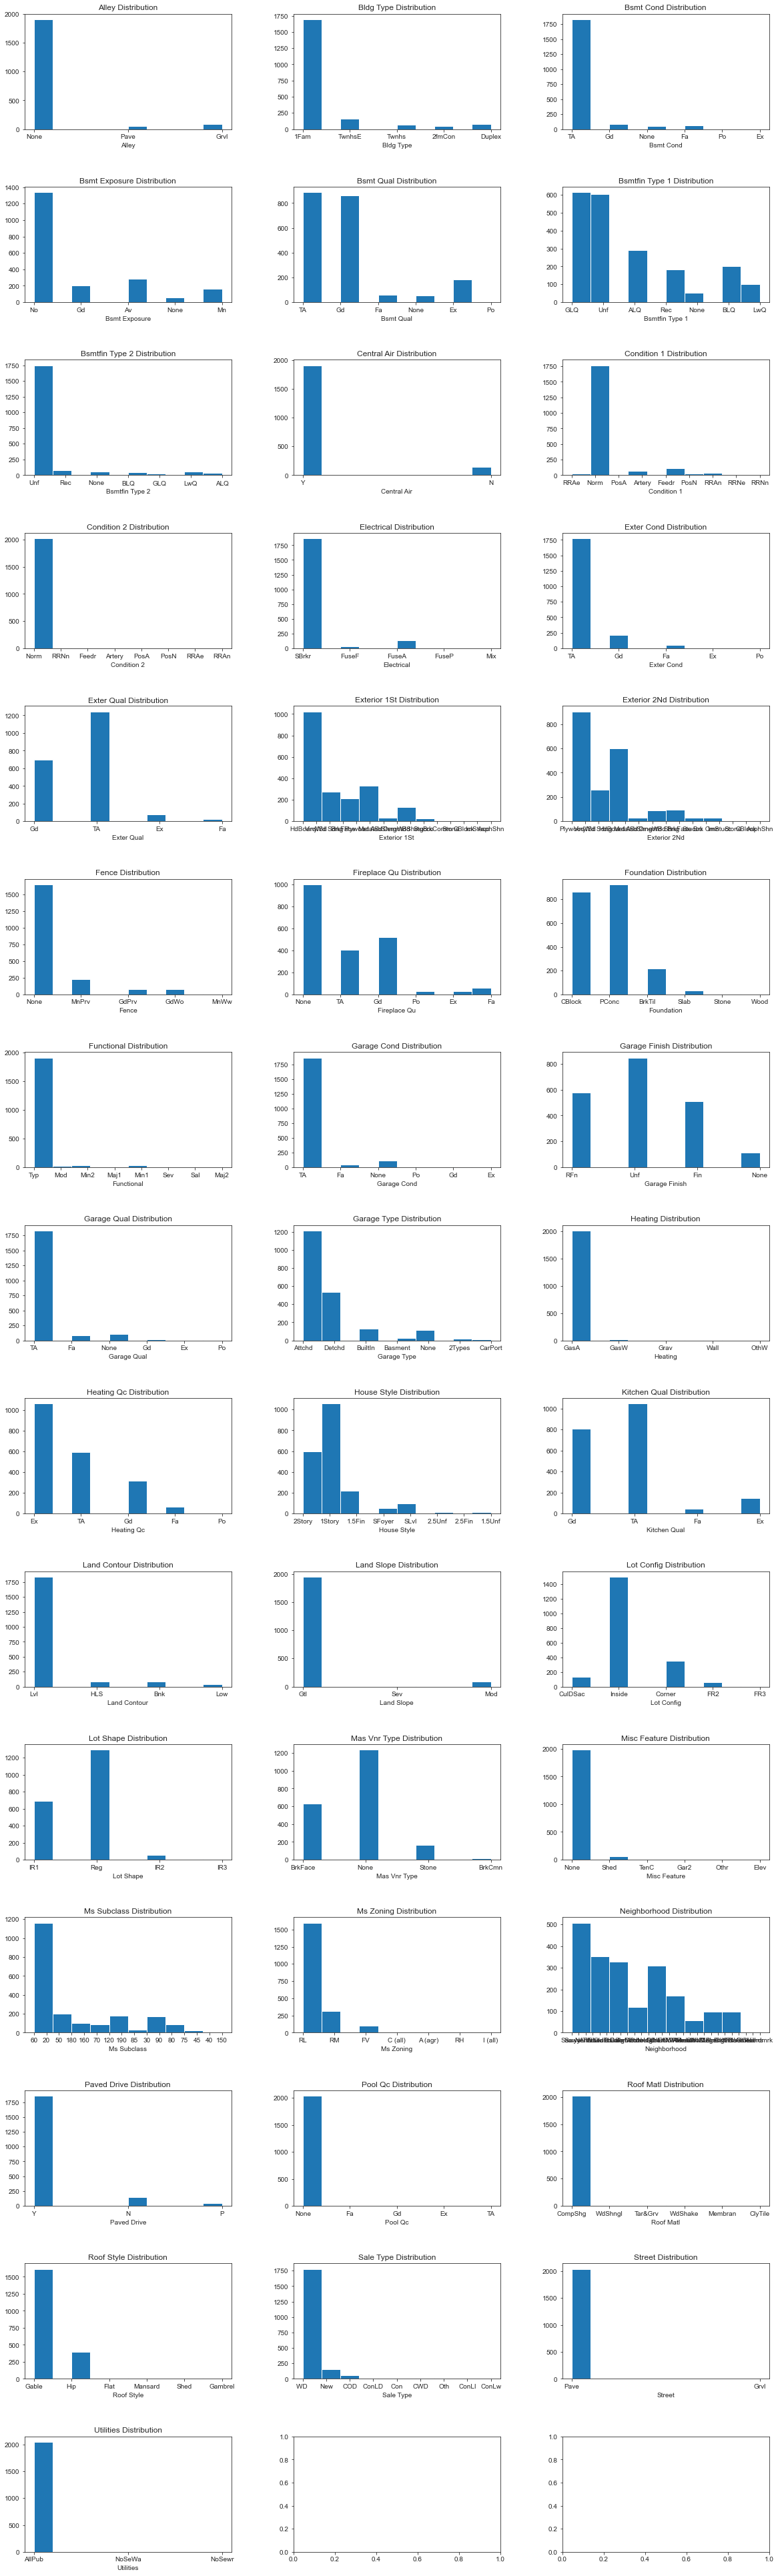

In [28]:
# Create histograms for categorical features using histogram subplot functions
subplot_histograms(train, categorical_list, categorical_title, categorical_x_labels)

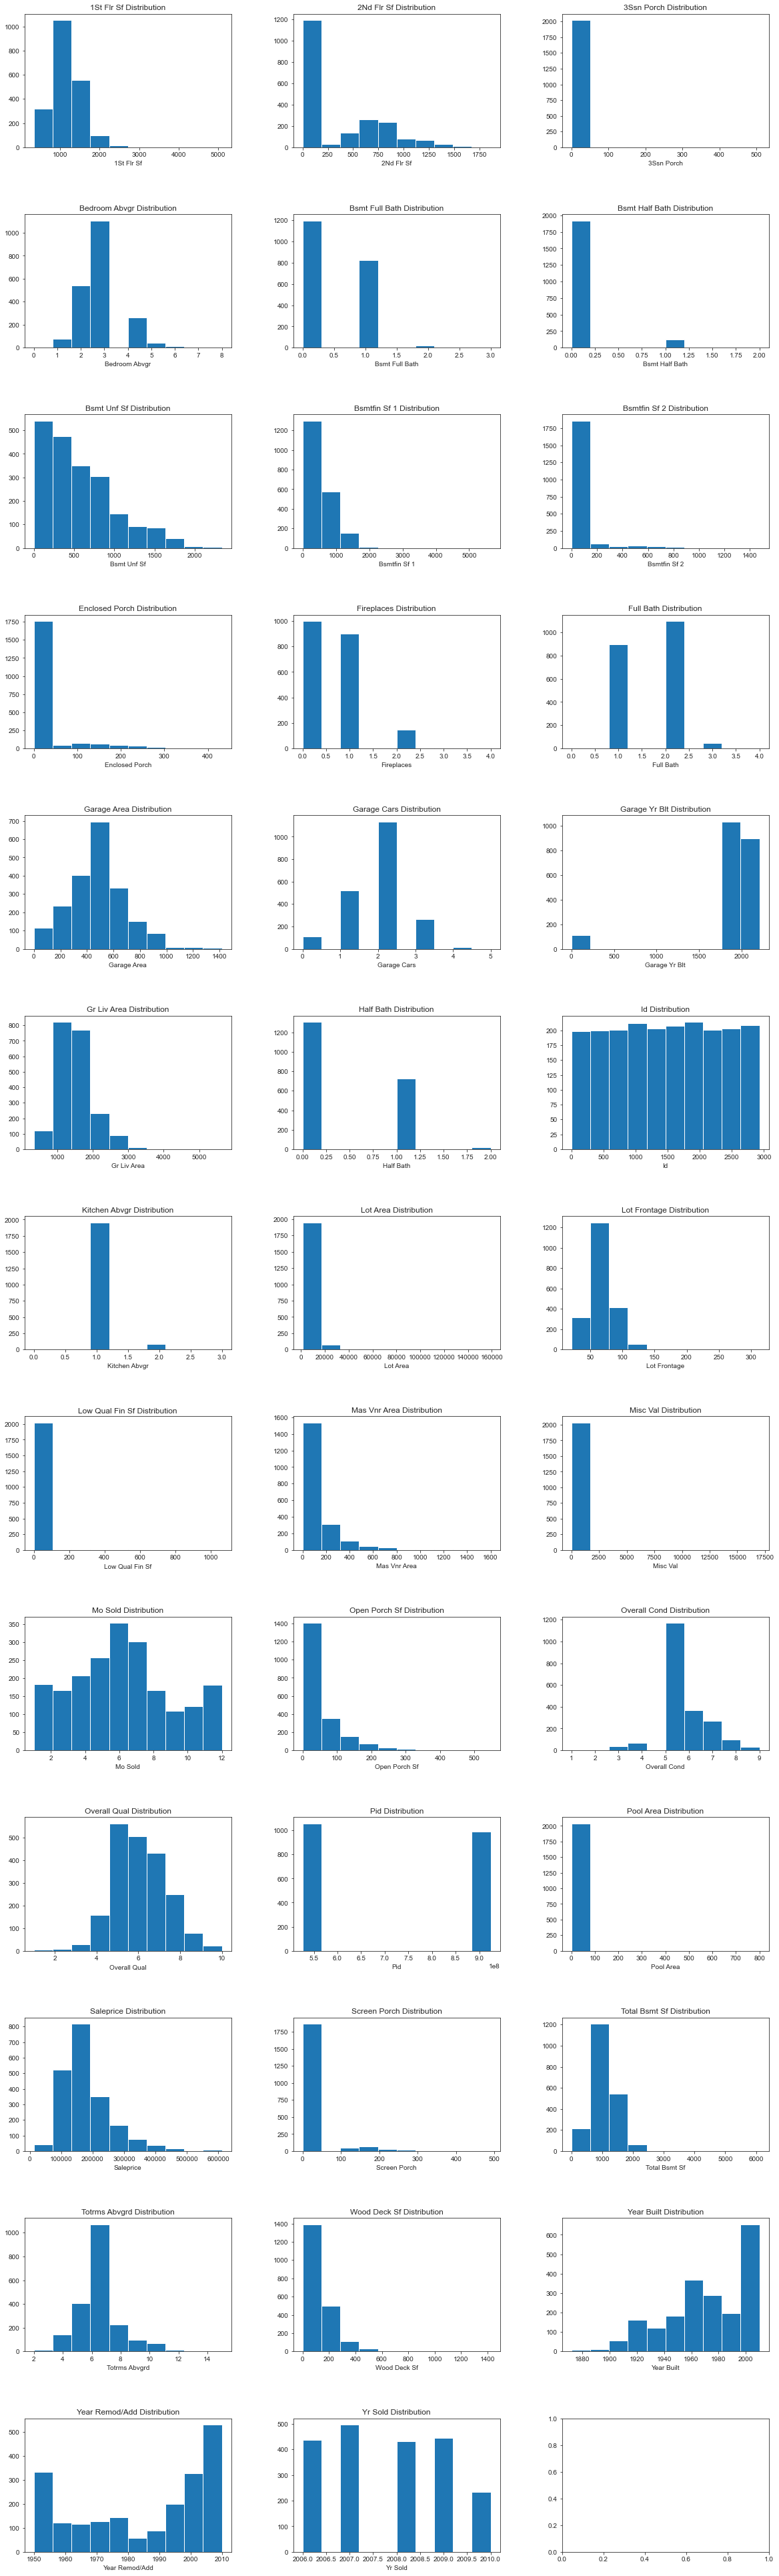

In [29]:
# Create histograms for numerical features using histogram subplot functions
subplot_histograms(train, numerical_list, numerical_title, numerical_x_labels)

The main observations from the histograms shows several trends:
- The highest count of overall quality and condition of the units sold are in the middle of the range which is between the score of 5 to 6.
- There is a high count of the houses sold in the dataset which are new and built around the year 2000. 
- For the sales price of the houses, it can be seen that it is right skewed where there are more houses sold at the lower price range of \\$0 to \\$250K. 
- For the distribution of the month sold, the months where more houses are sold in are in middle of the year (June and July).

#### Check for the columns with a high percentage of single value (80% or more)

In [30]:
def single_value(df):
    single_col_list = []
    for col in df.columns:
        single_val = df[col].value_counts(normalize = True) * 100
        if single_val.iloc[0] >= 80:
            single_col_list.append(col)
    print(single_col_list)
    return single_col_list

In [31]:
# list of columns that have more than 80% single value
single_value(train);

['3ssn_porch', 'alley', 'bldg_type', 'bsmt_cond', 'bsmt_half_bath', 'bsmtfin_sf_2', 'bsmtfin_type_2', 'central_air', 'condition_1', 'condition_2', 'electrical', 'enclosed_porch', 'exter_cond', 'fence', 'functional', 'garage_cond', 'garage_qual', 'heating', 'kitchen_abvgr', 'land_contour', 'land_slope', 'low_qual_fin_sf', 'misc_feature', 'misc_val', 'paved_drive', 'pool_area', 'pool_qc', 'roof_matl', 'sale_type', 'screen_porch', 'street', 'utilities']


### Plotting of Boxplots and Scatter plots

I will plotting boxplots for categorical data and scatter plots for numerical data to observe the trends and patterns if there any.

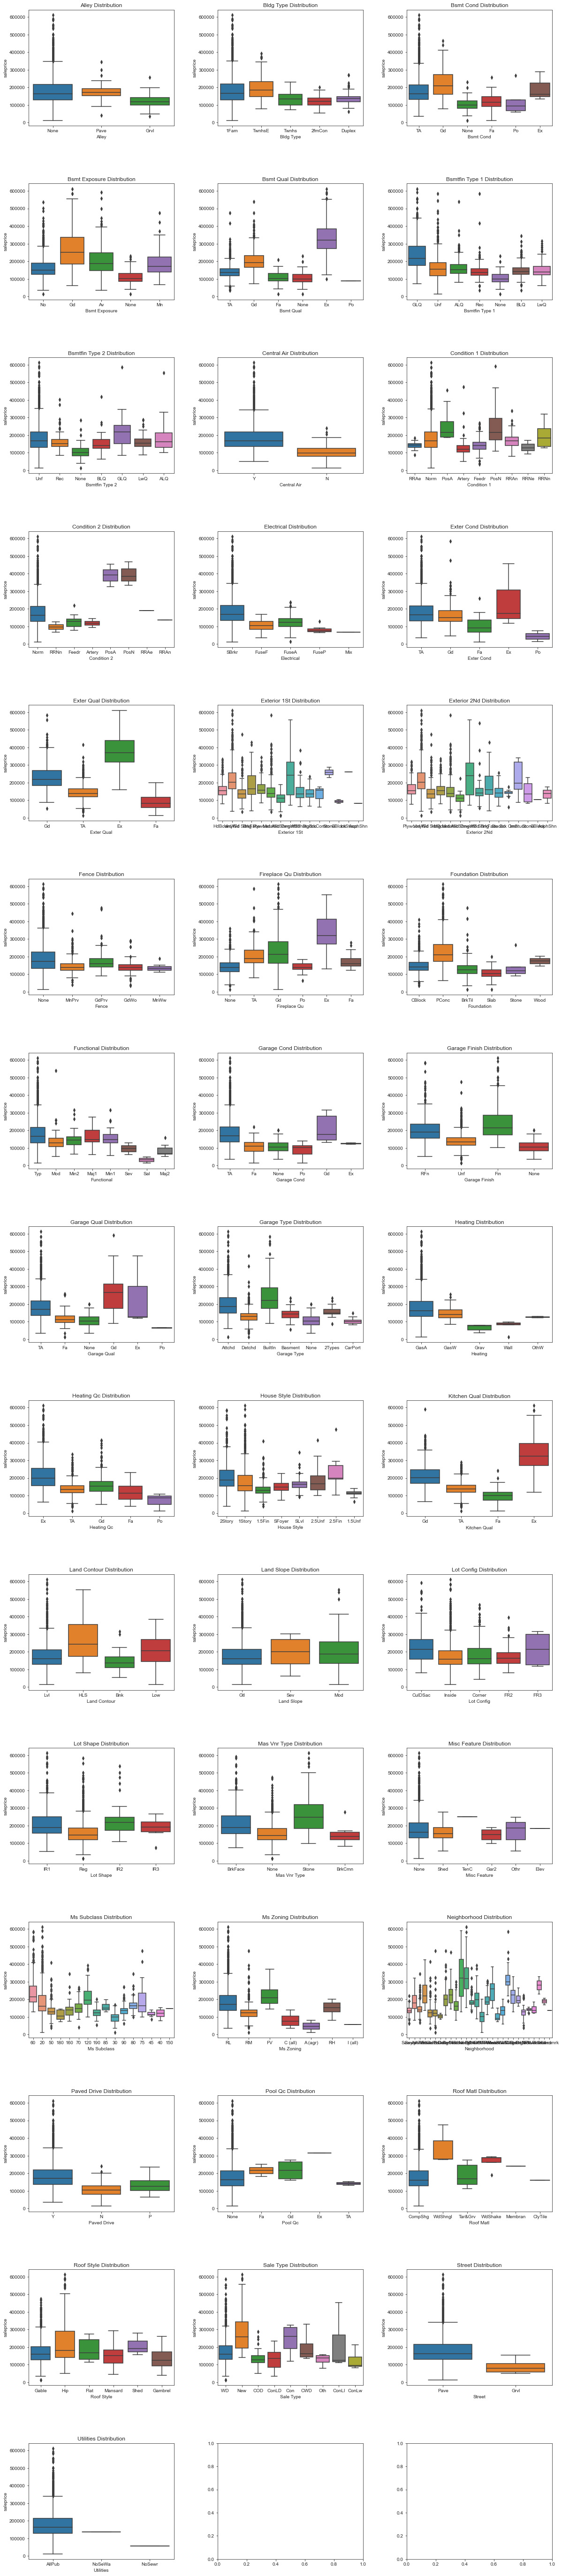

In [32]:
# Plot the boxplots for the features

subplot_boxplots(train, categorical_list, categorical_title, categorical_x_labels)

Some of the categorical features that look like it will affect sale price include `neighborhoods` (which we will observe in further detail), `condition_1`, `condition_2` and `kitchen_qual`. 

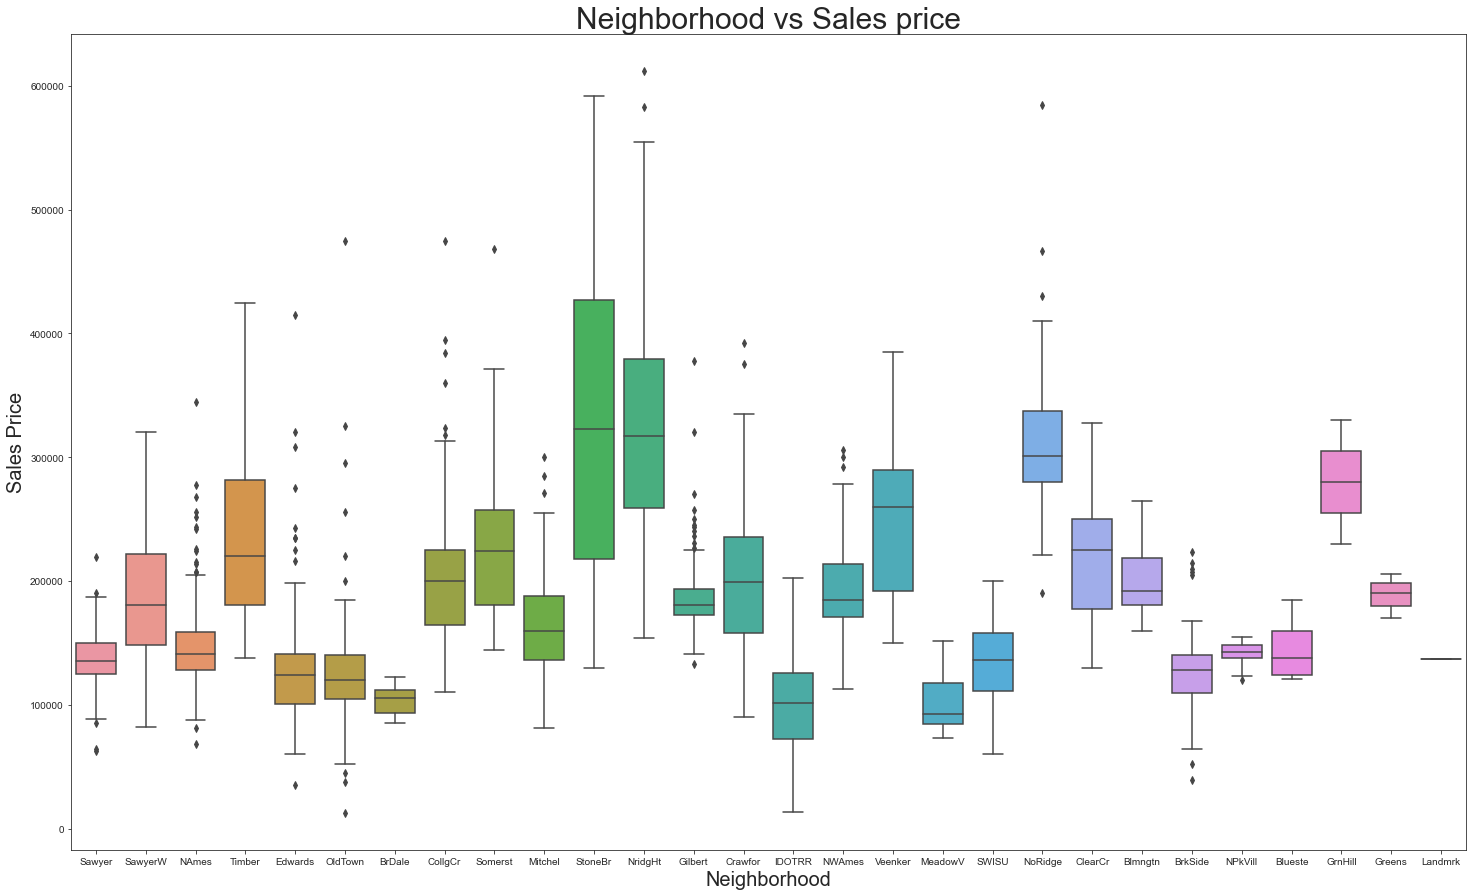

In [33]:
# plotting of separate box plot for neighborhood feature against sales price for a closer look
plt.figure(figsize = (25,15))
sns.boxplot(x = 'neighborhood', y = 'saleprice', data = train)
plt.title('Neighborhood vs Sales price', fontsize = 30)
plt.xlabel("Neighborhood", fontsize = 20)
plt.ylabel("Sales Price", fontsize = 20);

For the boxplot of the `neighborhoods` vs `sale_price`, it can be seen that the neighbourhood which the houses are located in would greatly affect the sale price of the houses. Observing the interquartile range, the 3 neighbourhoods of Stone Brook (StoneBr), Northridge Heights (NridgHt), Northridge (NoRidge) are fetching higher sales prices compared to the other neighbourhoods. The maximum sale prices (including outliers) in this dataset are also observed in these neighbourhoods. On the other end of the scale, the neighbourhoods with the lowest sales price are Iowa DOT and Rail Road (IDOTRR), Briardale (BrDale) and Meadow Village (MeadowV). The lowest sales prices in this data are found in Iowa DOT and Rail Road (IDOTRR), Old Town (OldTown) and Edwards. 

Based on the value counts of the neighborhood column, it can be seen that for some of the neighborhoods with small number of values like Greens, Grnhill, Landmrk which will mean that the sale price reflected in these neighborhoods might not be the true sale price due to the small sample size. 

As expected, the neighbourhood which the house is located in will be an important factor affecting the sales price of the house. 


In [34]:
# to check the value counts within the neighborhood column.

train['neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    142
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     75
Crawfor     71
IDOTRR      68
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

In [35]:
# Display the lowest sales price and the respective neighbourhoods

train[['neighborhood', 'saleprice']].sort_values(by = ['saleprice']).head(10)

,neighborhood,saleprice
1628,OldTown,12789
183,IDOTRR,13100
1309,IDOTRR,34900
1292,Edwards,35000
1518,IDOTRR,35311
1564,OldTown,37900
1428,BrkSide,39300
408,IDOTRR,40000
103,IDOTRR,44000
1089,OldTown,45000


In [36]:
# Display the highest sales price and the respective neighbourhoods

train[['neighborhood', 'saleprice']].sort_values(by = ['saleprice']).tail(10)

,neighborhood,saleprice
1592,StoneBr,535000
823,StoneBr,538000
138,StoneBr,545224
623,NridgHt,552000
1164,NridgHt,555000
151,StoneBr,556581
1796,NridgHt,582933
1692,NoRidge,584500
1964,StoneBr,591587
1671,NridgHt,611657


In [37]:
# Create a list of titles for the scatter plots

numerical_title_scatter = [word.replace('_', ' ').title() + ' vs Sale Price' for word in numerical_list]

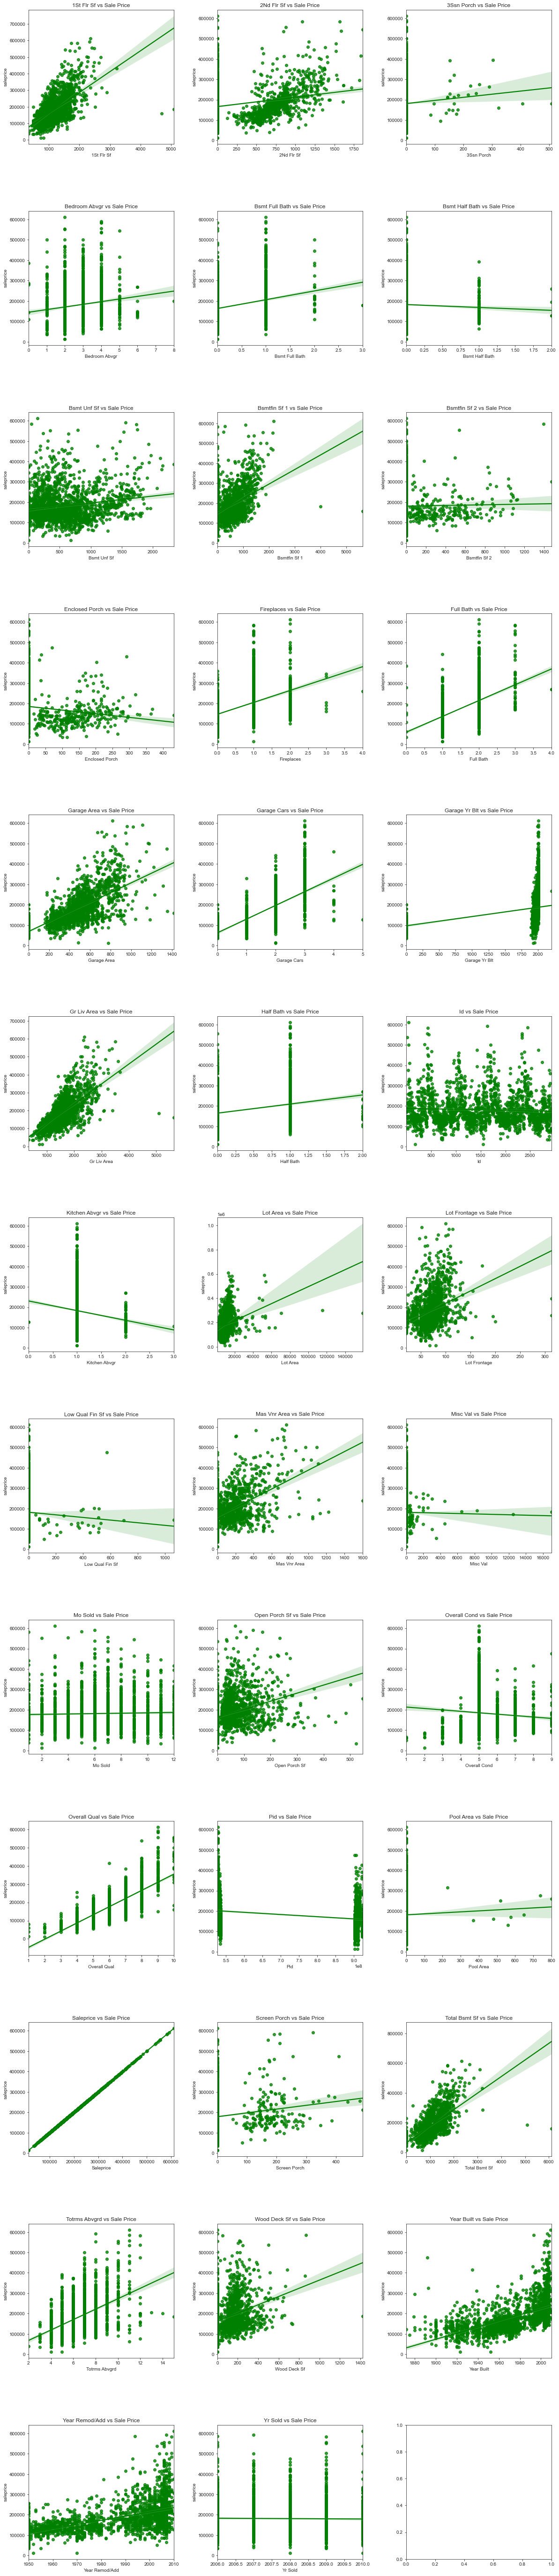

In [38]:
# plotting of scatterplots for numercial features

subplot_scatterplots(train, numerical_list, numerical_title_scatter, numerical_x_labels)

From the scatterplots above, there are several features that exhibit linear relationship with `sale_price` and those includes `overall_qual`, `total_bsmt_sf`, `garage_area`, `year_built` and `1st_flr_sf` as some of the examples. It can be noted that many of these features are representing areas within the house and the quality of the house and it can be thought that these features would be important predictor of `sale_price`. 

It can be seen that there are several features that have outliers and these outliers will be dropped.
- `'1st_flr_sf'`, the 2 points larger than 4,000 will be dropped.
- `'gr_liv_area'`, the 2 points above 4,500 will be dropped.
- `'lot_area'`, the 2 points above 100,000 will be dropped.
- `'lot_frontage'`, the 2 points above 300 will be dropped.
- `'total_bsmt_sf'`, the 2 points above 4,500 will be dropped.
- `'wood_deck_sf'`, the 1 points above 1,200 will be dropped.


In [39]:
train.drop(train[train['1st_flr_sf'] > 4000].index, inplace = True)
train.drop(train[train['gr_liv_area'] > 4500].index, inplace = True)
train.drop(train[train['lot_area'] > 100_000].index, inplace = True)
train.drop(train[train['lot_frontage'] > 300].index, inplace = True)
train.drop(train[train['total_bsmt_sf'] > 4500].index, inplace = True)
train.drop(train[train['wood_deck_sf'] > 1200].index, inplace = True)

In [40]:
train.shape

(2042, 81)

### Dropping of columns after review

From the above correlation matrix, histograms, scatterplots and boxplots, we make the following changes: 

<u>Columns to drop due to a weak correlation to sale price (between 0.25 to -0.25):</u>

```'2nd_flr_sf', 'bsmt_unf_sf', 'bedroom_abvgr', 'screen_porch', '3ssn_porch', 'mo_sold', 'pool_area', 'bsmtfin_sf_2', 'misc_val', 'yr_sold', 'low_qual_fin_sf', 'bsmt_half_bath', 'id', 'overall_cond', 'kitchen_abvgr', 'enclosed_porch'```
 
<u>Columns to drop due to high percentage of zeros or single value (more than 80%): </u>

```'3ssn_porch', 'alley', 'bldg_type', 'bsmt_cond', 'bsmt_half_bath', 'bsmtfin_sf_2', 'bsmtfin_type_2', 'central_air', 'condition_1', 'condition_2', 'electrical', 'enclosed_porch', 'exter_cond', 'fence', 'functional', 'garage_cond', 'garage_qual', 'heating', 'kitchen_abvgr', 'land_contour', 'land_slope', 'low_qual_fin_sf', 'misc_feature', 'misc_val', 'paved_drive',  'pool_qc', 'roof_matl', 'sale_type', 'screen_porch', 'street', 'utilities'```

Exceptions to this list include the columns of ```'3ssn_porch', 'enclosed_porch','screen_porch', 'pool_area', 'id'``` which will be processed in the next notebook.

<u>Addtional column to drop:</u>
- ```'pid'``` column will be dropped.

<u>Collinear features to drop: </u>
- ```'garage_cars'``` collinear with ```'garage_area'``` in which a larger garage area would equate to more cars being able to be store in the garage. Hence, I will be dropping ```'garage car'``` column.
- ```'totrms_abvgrd'``` collinear with ```'gr_liv_area'``` in which a larger ground living area would mean more rooms above ground in the house. Hence, I will be dropping ```'totrms_abvgrd'``` column.
- ```'bsmtfin_sf_1'``` is collinear with ```'1st_flr_sf'``` from the correlation matrix in which the basement size should be roughly the size of the 1st floor square area hence I will be dropping ```'bsmtfin_sf_1'``` column.


In [41]:
# get the list of columns to drop due to a weak correlation to sale price (between 0.25 to -0.25)

train_corr_drop = train_corr_sorted.index[(train_corr_sorted['saleprice'] <= 0.25) & (train_corr_sorted['saleprice'] >= -0.25)].tolist()
train_corr_drop

['2nd_flr_sf',
 'bsmt_unf_sf',
 'bedroom_abvgr',
 'screen_porch',
 '3ssn_porch',
 'mo_sold',
 'pool_area',
 'bsmtfin_sf_2',
 'misc_val',
 'yr_sold',
 'low_qual_fin_sf',
 'bsmt_half_bath',
 'id',
 'overall_cond',
 'kitchen_abvgr',
 'enclosed_porch']

In [42]:
# get the list of columns to drop due to high percentage of zeros or single value (more than 80%):

single_val_drop = single_value(train)


['3ssn_porch', 'alley', 'bldg_type', 'bsmt_cond', 'bsmt_half_bath', 'bsmtfin_sf_2', 'bsmtfin_type_2', 'central_air', 'condition_1', 'condition_2', 'electrical', 'enclosed_porch', 'exter_cond', 'fence', 'functional', 'garage_cond', 'garage_qual', 'heating', 'kitchen_abvgr', 'land_contour', 'land_slope', 'low_qual_fin_sf', 'misc_feature', 'misc_val', 'paved_drive', 'pool_area', 'pool_qc', 'roof_matl', 'sale_type', 'screen_porch', 'street', 'utilities']


In [43]:
# get the full list of the columns to drop

col_drop_lst = train_corr_drop
[col_drop_lst.append(x) for x in single_val_drop if x not in col_drop_lst]

# list of features not to drop yet for feature engineering
exception_lst = ['3ssn_porch', 'enclosed_porch', 'screen_porch', 'id', 'yr_sold', 'pool_area']
[col_drop_lst.remove(x) for x in exception_lst]

# to include additional features to drop which are collinear and pid column
col_drop_lst.extend(['pid' , 'bsmtfin_sf_1', 'garage_cars','totrms_abvgrd'])
col_drop_lst.sort()
print("Number of columns dropped: ", len(col_drop_lst))
col_drop_lst

Number of columns dropped:  37


['2nd_flr_sf',
 'alley',
 'bedroom_abvgr',
 'bldg_type',
 'bsmt_cond',
 'bsmt_half_bath',
 'bsmt_unf_sf',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmtfin_type_2',
 'central_air',
 'condition_1',
 'condition_2',
 'electrical',
 'exter_cond',
 'fence',
 'functional',
 'garage_cars',
 'garage_cond',
 'garage_qual',
 'heating',
 'kitchen_abvgr',
 'land_contour',
 'land_slope',
 'low_qual_fin_sf',
 'misc_feature',
 'misc_val',
 'mo_sold',
 'overall_cond',
 'paved_drive',
 'pid',
 'pool_qc',
 'roof_matl',
 'sale_type',
 'street',
 'totrms_abvgrd',
 'utilities']

In [44]:
# drop the columns with a high percentage of zero or single values
# collinear columns and weak correlation with sale price

train.drop(col_drop_lst, axis = 1, inplace = True)

In total, we are dropping 37 columns before proceeding to the feature processing portion.

### Output cleaned train data

In [45]:
train_clean = train.copy()
train_clean.to_csv('../datasets/train_clean.csv', index = False)

In [46]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2050
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   1st_flr_sf      2042 non-null   int64  
 1   3ssn_porch      2042 non-null   int64  
 2   bsmt_exposure   2042 non-null   object 
 3   bsmt_full_bath  2042 non-null   float64
 4   bsmt_qual       2042 non-null   object 
 5   bsmtfin_type_1  2042 non-null   object 
 6   enclosed_porch  2042 non-null   int64  
 7   exter_qual      2042 non-null   object 
 8   exterior_1st    2042 non-null   object 
 9   exterior_2nd    2042 non-null   object 
 10  fireplace_qu    2042 non-null   object 
 11  fireplaces      2042 non-null   int64  
 12  foundation      2042 non-null   object 
 13  full_bath       2042 non-null   int64  
 14  garage_area     2042 non-null   float64
 15  garage_finish   2042 non-null   object 
 16  garage_type     2042 non-null   object 
 17  garage_yr_blt   2042 non-null   f

### Import test data, clean test data and output clean test data

I will repeat the steps taken for the train data and apply it to the test data to carry out the same cleaning, imputation and dropping of columns before outputting the clean test data. For the test data, I will not be dropping any rows of the test dataset.

In [47]:
test = pd.read_csv('../datasets/test.csv')

In [48]:
### Define main function for cleaning data ###
def cleaning_data(df):
    """function for cleaning, imputing and dropping of columns"""

    # change column to lowercase and replace space with underscore
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')

    # change null values in these columns to None
    col_list_none = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu', 'garage_finish',\
                 'garage_qual', 'garage_cond', 'garage_type', 'bsmt_exposure', 'bsmtfin_type_2',\
                 'bsmtfin_type_1', 'bsmt_cond', 'bsmt_qual', 'mas_vnr_type']
    for col in col_list_none:
        replace_to_none(df, col)

    # change null values in these columns to 0
    col_list_zero = ['mas_vnr_area', 'garage_yr_blt']
    for col in col_list_zero:
        replace_to_zero(df, col)

    # impute null values in lot_frontage
    df['lot_frontage'].fillna(df['lot_frontage'].median(), inplace = True)

    # change ms_subclass data type to str
    df['ms_subclass'] = df['ms_subclass'].astype(str)

    # drop columns which have a weak correlation to sale price, high percentage of zero of single value
    # collinear and pid column

    df.drop(col_drop_lst, axis = 1, inplace = True)

    return df

In [49]:
# apply function to test data

cleaning_data(test)

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,lot_config,neighborhood,house_style,overall_qual,...,garage_yr_blt,garage_finish,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,yr_sold
0,2658,190,RM,69.0,9142,Reg,Inside,OldTown,2Story,6,...,1910.0,Unf,440,0,60,112,0,0,0,2006
1,2718,90,RL,68.0,9662,IR1,Inside,Sawyer,1Story,5,...,1977.0,Fin,580,170,0,0,0,0,0,2006
2,2414,60,RL,58.0,17104,IR1,Inside,Gilbert,2Story,7,...,2006.0,RFn,426,100,24,0,0,0,0,2006
3,1989,30,RM,60.0,8520,Reg,Inside,OldTown,1Story,5,...,1935.0,Unf,480,0,0,184,0,0,0,2007
4,625,20,RL,68.0,9500,IR1,Inside,NAmes,1Story,6,...,1963.0,RFn,514,0,76,0,0,185,0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,60,RL,80.0,8000,Reg,Inside,NWAmes,2Story,6,...,1974.0,Unf,488,0,96,0,0,0,0,2007
874,1234,60,RL,90.0,14670,Reg,Inside,NAmes,2Story,6,...,1966.0,RFn,480,0,230,0,0,0,0,2008
875,1373,20,RL,55.0,8250,Reg,Inside,Sawyer,1Story,5,...,1968.0,Unf,322,0,63,0,0,0,0,2008
876,1672,20,RL,60.0,9000,Reg,FR2,NAmes,1Story,4,...,1974.0,Unf,528,0,0,0,0,0,0,2007


In [50]:
# to confirm that the cleaned test dataset has the same number columns
# as the cleaned train dataset and all null values have been dealt with

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              878 non-null    int64  
 1   ms_subclass     878 non-null    object 
 2   ms_zoning       878 non-null    object 
 3   lot_frontage    878 non-null    float64
 4   lot_area        878 non-null    int64  
 5   lot_shape       878 non-null    object 
 6   lot_config      878 non-null    object 
 7   neighborhood    878 non-null    object 
 8   house_style     878 non-null    object 
 9   overall_qual    878 non-null    int64  
 10  year_built      878 non-null    int64  
 11  year_remod/add  878 non-null    int64  
 12  roof_style      878 non-null    object 
 13  exterior_1st    878 non-null    object 
 14  exterior_2nd    878 non-null    object 
 15  mas_vnr_type    878 non-null    object 
 16  mas_vnr_area    878 non-null    float64
 17  exter_qual      878 non-null    obj

In [51]:
test_clean = test.copy()
test_clean.to_csv('../datasets/test_clean.csv', index = False)

## Conclusion

From the EDA of the data, it has revealed several issues with the data like null values, features with a large percentage of single value data, outliers within the features and features which are weakly correlate with the sale price of the house. Further pre-processing would be done in the next notebook to feature engineer some of the features before proceeding for modelling. 

From the EDA, it can be seen that features like square area of the house (e.g. ```gr_liv_area```, ```garage_area```, ```total_bsmt_sf```, ```1st_flr_sf```) , quality of the house (overall_qual) and age of the house (e.g. ```year_built```, ```year_remod/add```) are all important factors to determine the sale price of house. Other than numerical features, from the box plot, categorical feature like ```neighborhood``` are also important factor that can affect the sale price of the houses. 
